In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [3]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
celsius_q = np.array([-40, -10,  0,  8, 15, 22,  38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)
for i,c in enumerate(celsius_q):
    print("{} degrees celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees celsius = -40.0 degrees Fahrenheit
-10.0 degrees celsius = 14.0 degrees Fahrenheit
0.0 degrees celsius = 32.0 degrees Fahrenheit
8.0 degrees celsius = 46.0 degrees Fahrenheit
15.0 degrees celsius = 59.0 degrees Fahrenheit
22.0 degrees celsius = 72.0 degrees Fahrenheit
38.0 degrees celsius = 100.0 degrees Fahrenheit


# Creating the model
The model has one layer with mone unit "neuron", we first create layer caller l0 using tf.keras.layers.Dense

In [5]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

once the layers are created we assemble them in to a model,in our case we have only one layer l0 

In [6]:
model = tf.keras.Sequential([l0])

# Compliling the model with a loss and optimize functions

In [7]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

# Training the model using the fit method

In [8]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


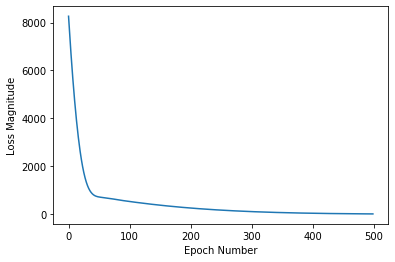

In [13]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [10]:
print(model.predict([100.0]))

[[211.27567]]


In [11]:
print("These are the layer variables {}".format(l0.get_weights()))

These are the layer variables [array([[1.8291762]], dtype=float32), array([28.358042], dtype=float32)]


In [18]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss ="mean_squared_error",optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("finished training the data")
print("100 degrees celsius equal {} degrees Fahrenheir ".format(model.predict([100.0])))
print("These are the layer l0 variables {}".format(l0.get_weights()))
print("These are the layer l1 variables {}".format(l1.get_weights()))
print("These are the layer l2 variables {}".format(l2.get_weights()))

finished training the data
100 degrees celsius equal [[211.7474]] degrees Fahrenheir 
These are the layer l0 variables [array([[-0.6801208 ,  0.79506344,  0.03384461,  0.04358057]],
      dtype=float32), array([-2.8412323,  2.8405085, -2.5636857,  2.1141782], dtype=float32)]
These are the layer l1 variables [array([[-0.5896208 , -0.46090487, -0.57883793,  0.4082856 ],
       [ 0.16333468, -0.09297268,  0.728837  ,  0.72606725],
       [-1.1948497 , -0.993985  ,  0.1605857 , -1.2797406 ],
       [-0.13327065,  0.6679332 , -0.2579568 ,  0.75441724]],
      dtype=float32), array([2.8595488, 2.7986271, 2.8640954, 2.8019068], dtype=float32)]
These are the layer l2 variables [array([[0.5493132],
       [1.1455612],
       [0.9348525],
       [1.2387366]], dtype=float32), array([2.8541079], dtype=float32)]
